# Producción de Energía

<b><i style="font-size:13px">Tags: </i></b><i style="font-size:11px">Transporte</i>

## Enunciado
CryptOR is una compañía que se dedica a minar criptomonedas. El mayor problema de planeación para CryptOR es la compra de energía. Dado el alto consumo de energía, CryptOR debe negociar contratos para los proximos 12 meses con las diferentes empresas de generación eléctrica. El costo por kilovatio-hora (kWh) varía según la cantidad de energía contratada y la empresa generadora. El costo total en función del consumo esta representado por funciones no lineales suministradas por cada generadora. Asi mismo, cada empresa generadora establece la duración de cada contrato que se firme con la misma. Los contratos se pueden renovar durante los 12 meses de planeacion, pero en ningun mes se puede firmar mas de un contrato por generadora. El consumo máximo mensual es de 250 kWh para cada generadora. Finalmente, se conoce un pronostico de la demanda de energia en kWh. Las Tablas 1 y 2 resumen toda la informacion disponible. 

### Tabla 1. Terminos de los contratos para cada generadora.

|                     |**Función de costo**                      | **Duración del contrato**| **Consumo máximo mensual**|
|:-------------------:|:----------------------------------------:|:------------------------:|:-------------------------:|
|**Generadora Carbón**|$f_1(x) = 0.0012 x^2$                     | 2 meses                  | 250 kWh                   |
|**Generadora Solar** |$f_2(x) = 0.0028 x^2 - 0.5x + 35$         | 4 meses                  | 250 kWh                   |
|**Generadora Eólica**|$f_3(x) = 0.5 x log(\frac{x}{150}) + 30$  | 3 meses                  | 250 kWh                   |

### Tabla 2. Demanda mensual en kWh.

|Mes| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|demanda| 350| 500| 500| 600| 700| 500| 600| 400| 400| 400| 400| 400|

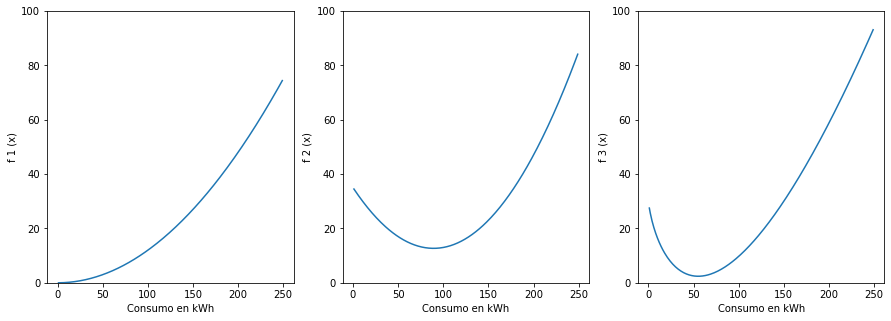

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    # Función de costo de la generadora carbón
    return 0.0012 * (x ** 2)
def f2(x):
    # Función de costo de la generadora solar
    return 0.0028 * x ** 2 - 0.5*x + 35
def f3(x):
    # Función de costo de la generadora eólica
    return 0.5 * x*np.log(x/150) + 30

# Puntos de evaluacion de la función
kwh = np.arange(1,250)

fig, axs = plt.subplots(1,3, sharey=False, sharex=True, figsize=(15,5))
axs[0].plot(kwh, f1(kwh))
axs[1].plot(kwh, f2(kwh))
axs[2].plot(kwh, f3(kwh))
for ax_ix, ax in enumerate(axs):
    ax.set_xlabel("Consumo en kWh")
    ax.set_ylabel(f"f {ax_ix+1} (x)")
    ax.set_ylim([0,100])



## Linealización a trozos

Optimizar utilizando las funciones $f_1(x)$, $f_2(x)$ y $f_3(x)$ es computacionalmente más difícil debido a son funciones no lineales. Sin embrago, dado que son funciones [convexas](https://es.wikipedia.org/wiki/Funci%C3%B3n_convexa) es posible aproximarlas con multiples funciones lineales. Dada una función convexa $f(x)$, la funcion $g(x;x_0) = f(x_0) + f'(x_0) * (x-x0)$ es una aproximación de [primer orden](https://es.wikipedia.org/wiki/Serie_de_Taylor), la cual es exacta en $x_0$ y se degrada a medida que $x$ se aleja de $x_0$. Con esta idea en mente, cualquier función convexa se puede aproximar generando multiples funciones de forma  $g(x;x_0)$ para diferentes valores de $x_0$. La siguiente celda muestra la funcion $f(x) = (x - 4)^2$ (en azul) y su aproximación utilizando 4 rectas correspondientes a  $g(x;x_0)$ para $x_0=0,2,4,5$.

Función evaluada en 0:  16.000 + -8.000 * (x - 0)
Función evaluada en 2:  4.000 + -4.000 * (x - 2)
Función evaluada en 4:  0.000 + 0.000 * (x - 4)
Función evaluada en 5:  1.000 + 2.000 * (x - 5)


(-1.0, 20.0)

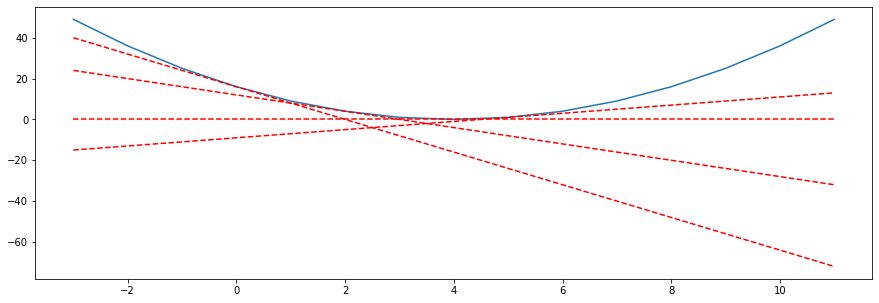

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, orden=0):
    if orden == 0:
        # Función (x-4) ^ 2
        return  (x-4) ** 2 
    else:
        # Derivada evaluada en x
        return 2 *(x - 4)

# Puntos de evaluacion de la función
dominio = np.arange(-3,12)

fig, axs = plt.subplots(1,1, sharey=False, sharex=True, figsize=(15,5))
axs.plot(dominio, f(dominio))
for x_0 in [0, 2, 4, 5]:
    axs.plot(dominio, f(x_0) +  f(x_0,1) * (dominio - x_0), linestyle='dashed', color='red')
    print(f'Función evaluada en {x_0}:  {f(x_0):.3f} + {f(x_0, 1):.3f} * (x - {x_0})')
axs.set_xlabel("Consumo en kWh")
axs.set_ylabel(f"f(x)")
axs.set_ylim([-1,20])


Función 1 evaluada en 20:  0.480 + 0.048 * (x - 20)
Función 1 evaluada en 50:  3.000 + 0.120 * (x - 50)
Función 1 evaluada en 100:  12.000 + 0.240 * (x - 100)
Función 1 evaluada en 200:  48.000 + 0.480 * (x - 200)
Función 2 evaluada en 20:  26.120 + -0.388 * (x - 20)
Función 2 evaluada en 50:  17.000 + -0.220 * (x - 50)
Función 2 evaluada en 100:  13.000 + 0.060 * (x - 100)
Función 2 evaluada en 200:  47.000 + 0.620 * (x - 200)
Función 3 evaluada en 20:  9.851 + -0.507 * (x - 20)
Función 3 evaluada en 50:  2.535 + -0.049 * (x - 50)
Función 3 evaluada en 100:  9.727 + 0.297 * (x - 100)
Función 3 evaluada en 200:  58.768 + 0.644 * (x - 200)


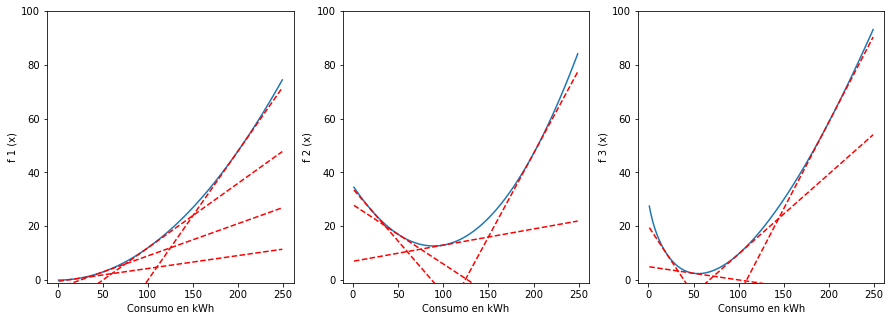

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x, orden=0):
    if orden == 0:
        # Función de costo de la generadora carbón
        return 0.0012 * (x ** 2) 
    else:
        # Derivada evaluada en x
        return 0.0012 * 2 * x

def f2(x, orden=0):
    if orden == 0:
        # Función de costo de la generadora solar
        return 0.0028 * x ** 2 - 0.5*x + 35
    else:
        # Derivada evaluada en x
        return 2 * 0.0028 * x - 0.5
def f3(x, orden=0):
    if orden == 0:
        # Función de costo de la generadora eólica
        return 0.5 * x*np.log(x/150) + 30
    else:
        # Derivada evaluada en x
        return 0.5 * np.log(x/150) + 0.5

# Funciones de costo
f = [f1,f2,f3]
# Puntos de evaluacion de la función
kwh = np.arange(1,250)

fig, axs = plt.subplots(1,3, sharey=False, sharex=True, figsize=(15,5))
for i, ax in enumerate(axs):
    axs[i].plot(kwh, f[i](kwh), )
    for x_0 in [20, 50, 100, 200]:
        axs[i].plot(kwh, f[i](x_0) +  f[i](x_0,1) * (kwh - x_0), linestyle='dashed', color='red')
        print(f'Función {i+1} evaluada en {x_0}:  {f[i](x_0):.3f} + {f[i](x_0, 1):.3f} * (x - {x_0})')
    ax.set_xlabel("Consumo en kWh")
    ax.set_ylabel(f"f {i+1} (x)")
    ax.set_ylim([-1,100])


<div style="text-align:justify">
Formule un modelo general de optimización lineal que le permita a La Lechera Ramírez satisfacer la demanda de sus clientes, al menor costo posible. Para esto usted debe seguir los siguientes pasos: 

## Formulación

**1.** Escriba lo(s) conjunto(s), parámetro(s) y variable(s) de decisión que utilizará en el modelo.  

### Conjuntos
- $P$: Plantas
- $D$: Distribuidores

### Parámetros
- $b_i$: oferta de leche de la planta $i\in P$
- $t_j$: demanda de leche del distribuidor $j\in D$ 
- $c_{ij}$: costo de envío de un litro de leche de la planta $i\in P$ al distribuidor $j\in D$

### Variables de decisión
- $x_{ij}$: cantidad (en litros) de leche que van de la planta $i\in P$ al distribuidor $j\in D$

### Restricciones
**2.** Escriba la(s) restricción(es) lineal(es) que garantiza(n) que se debe respetar la oferta de las plantas. 


$$
\begin{align}
\sum_{j\in D}x_{ij} &\le b_i, &&\forall i\in P.
\end{align}
$$

**3.** Escriba la(s) restricción(es) lineal(es) que garantiza(n) que se debe satisfacer la demanda de los distribuidores.  

$$
\begin{align}
\sum_{i\in P}x_{ij} &\ge t_j, &&\forall j\in D.
\end{align}
$$

**4.** Escriba la(s) restricción(es) que describe(n) matemáticamente el tipo de variable(s) que está utilizando dentro del modelo. 

$$
\begin{align}
x_{ij} & \ge 0, &&\forall i\in P,j\in D.
\end{align}
$$

### Función Objetivo
**5.** Escriba la función objetivo.

$$
\text{minimizar }  \sum_{i\in P}\sum_{j\in D}x_{ij}c_{ij}
$$

## Formulación matemática completa

**Conjuntos:**
- $P$: Plantas
- $D$: Distribuidores

**Parámetros:**
- $b_i$: oferta de leche de la planta $i\in P$
- $t_j$: demanda de leche del distribuidor $j\in D$ 
- $c_{ij}$: costo de envío de un litro de leche de la planta $i\in P$ al distribuidor $j\in D$

**Variables de decisión:**
- $x_{ij}$: cantidad (en litros) de leche que van de la planta $i\in P$ al distribuidor $j\in D$

**Modelo:**

$$
\text{minimizar }  \sum_{i\in P}\sum_{j\in D}x_{ij}c_{ij} \text{ (1)} 
$$

Sujeto a,

$$
\begin{align*}
\sum_{j\in D}x_{ij} &\le b_i, &&\forall i\in P; &(2)\\
\sum_{i\in P}x_{ij} &\ge t_j, &&\forall j\in D; &(3)\\
x_{ij} & \ge 0, &&\forall i\in P,j\in D. &(4)
\end{align*}
$$

La función objetivo (1) minimiza los costos totales. Las restricciones (2) garantizan que se debe respetar la oferta de las plantas. Las restricciones (3) garantizan que se debe satisfacer la demanda de los distribuidores. Las restricciones (4) describe la naturaleza de la variable $x_{ij}$. 

## Implementación
**6.** Resuelva el modelo planteado utilizando la librería de PulP en Python. ¿Cuál es la solución
óptima del problema? 

In [25]:
#se importa la libreria de PulP
import pulp as lp

#-----------------
# Conjuntos
#-----------------
#Plantas
P=["Planta 1",
   "Planta 2",
   "Planta 3",
   "Planta 4"]

#Distribuidores
D=["Distribuidor 1",
   "Distribuidor 2",
   "Distribuidor 3",
   "Distribuidor 4",
   "Distribuidor 5",
   "Distribuidor 6",
   "Distribuidor 7",
   "Distribuidor 8"]

# Conjunto con todas las duplas (planta, distribuidor)
P_x_D = [(planta, distribuidor) for planta in P for distribuidor in D] 

#-----------------
# Parámetros
#-----------------
b={#planta: oferta de la planta i
   "Planta 1":1500,
   "Planta 2":1200,
   "Planta 3":1400,
   "Planta 4":1000} 

t={#distribuidor: demanda del distribuidor j
   "Distribuidor 1":930,
   "Distribuidor 2":600,
   "Distribuidor 3":460,
   "Distribuidor 4":610,
   "Distribuidor 5":830,
   "Distribuidor 6":460,
   "Distribuidor 7":640,
   "Distribuidor 8":240} 

c={#(planta, distribuidor): costo de envio de un litro de leche desde la planta i al distribuidor j
   ("Planta 1","Distribuidor 1"):650,
   ("Planta 1","Distribuidor 2"):125,
   ("Planta 1","Distribuidor 3"):1200,
   ("Planta 1","Distribuidor 4"):340,
   ("Planta 1","Distribuidor 5"):150,
   ("Planta 1","Distribuidor 6"):260,
   ("Planta 1","Distribuidor 7"):350,
   ("Planta 1","Distribuidor 8"):800,
   ("Planta 2","Distribuidor 1"):250,
   ("Planta 2","Distribuidor 2"):200,
   ("Planta 2","Distribuidor 3"):250,
   ("Planta 2","Distribuidor 4"):600,
   ("Planta 2","Distribuidor 5"):150,
   ("Planta 2","Distribuidor 6"):950,
   ("Planta 2","Distribuidor 7"):1050,
   ("Planta 2","Distribuidor 8"):1000,
   ("Planta 3","Distribuidor 1"):600,
   ("Planta 3","Distribuidor 2"):350,
   ("Planta 3","Distribuidor 3"):400,
   ("Planta 3","Distribuidor 4"):260,
   ("Planta 3","Distribuidor 5"):150,
   ("Planta 3","Distribuidor 6"):300,
   ("Planta 3","Distribuidor 7"):450,
   ("Planta 3","Distribuidor 8"):600,
   ("Planta 4","Distribuidor 1"):450,
   ("Planta 4","Distribuidor 2"):800,
   ("Planta 4","Distribuidor 3"):650,
   ("Planta 4","Distribuidor 4"):250,
   ("Planta 4","Distribuidor 5"):340,
   ("Planta 4","Distribuidor 6"):700,
   ("Planta 4","Distribuidor 7"):600,
   ("Planta 4","Distribuidor 8"):620} 

#-------------------------------------
# Creación del objeto problema en PuLP
#-------------------------------------
#Crea el problema para cargarlo con la instancia 
problema=lp.LpProblem("Transporte",lp.LpMinimize)

#-----------------------------
# Variables de Decisión
#-----------------------------
x=lp.LpVariable.dicts('x',P_x_D,lowBound=0,cat='Continuous') #litros de leche que van de la planta i al distribuidor j;
                                                             #aca se añade de una vez la naturaleza de las variables

#-----------------------------
# Función objetivo
#-----------------------------
#Crea la expresión de minimización de costos
problema+=lp.lpSum(x[i,j]*c[i,j] for i in P for j in D), "Costos Totales"

#-----------------------------
# Restricciones
#-----------------------------
#sum(j in D)x_ij <= b_i forall i in P
for i in P:
    problema+= lp.lpSum(x[i,j] for j in D) <= b[i], "Oferta de la planta "+i   #se respeta la oferta de cada planta 

#sum(i in P)x_ij >= t_j forall j in D
for j in D:
    problema+= lp.lpSum(x[i,j] for i in P) >= t[j], "Demanda del distribuidor "+j #se satisface la demanda de cada distribuidor 
    
#-----------------------------
# Imprimir formato LP
#-----------------------------
#Escribe el problema en un archivo con formato LP 
problema.writeLP("Transporte.lp")

#-----------------------------
# Invocar el optimizador
#-----------------------------
#Optimizar el modelo con CBC (default de PuLP)
problema.solve()

#-----------------------------
#    Imprimir resultados
#-----------------------------
#Imprimir estado final del optimizador
print("Estado (optimizador):", lp.LpStatus[problema.status],end='\n')

#Valor óptimo del plan de transporte  
print("\nTransporte - Costos totales = $", round(lp.value(problema.objective),2))
print()

#Imprimir variables de decisión
print("Variables de decisión")
print("              ","D1","D2","D3","D4","D5","D6","D7","D8",sep='\t')
for i in P:
    print(i,end='\t')
    for j in D: 
        print(round(x[i,j].value()),end='\t')
    print()

Estado (optimizador): Optimal

Transporte - Costos totales = $ 1224800.0

Variables de decisión
              	D1	D2	D3	D4	D5	D6	D7	D8
Planta 1	0	600	0	0	0	260	640	0	
Planta 2	930	0	270	0	0	0	0	0	
Planta 3	0	0	190	0	830	200	0	180	
Planta 4	0	0	0	610	0	0	0	60	


## Créditos

Equipo de Optimización<br>
Instancia: Camilo Aguilar, Juan Felipe Rengifo<br>
Fecha: 20/09/2020